In [3]:
import numpy as np
data_file = "/home/mshefa/training_data/training_data_chunk_0.pkl"
data = LoadModRecData(data_file, .9, .1, 0.)


[Data Loader] - Loading Data...
[Data Loader] - Counting Number of Examples in Dataset...
[Data Loader] - Number of Examples in Dataset: 288000
[Data Loader] - [Modulation Dataset] Adding Collects for: 16PSK
[Data Loader] - [Modulation Dataset] Adding Collects for: 2FSK_5KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: 2FSK_75KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: 8PSK
[Data Loader] - [Modulation Dataset] Adding Collects for: AM_DSB
[Data Loader] - [Modulation Dataset] Adding Collects for: AM_SSB
[Data Loader] - [Modulation Dataset] Adding Collects for: APSK16_c34
[Data Loader] - [Modulation Dataset] Adding Collects for: APSK32_c34
[Data Loader] - [Modulation Dataset] Adding Collects for: BPSK
[Data Loader] - [Modulation Dataset] Adding Collects for: CPFSK_5KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: CPFSK_75KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: FM_NB
[Data Loader] - [Modulation Dataset] Adding Collects for: 

NameError: name 'number_of_samples_in_instance' is not defined

(1, 1024) 179
(1, 1024) 117
(1, 1024) 562
(1, 1024) 996
(1, 1024) 491
(1, 1024) 1486
(1, 1024) 80
(1, 1024) 1885
(1, 1024) 1880
(1, 1024) 1731
(1, 1024) 700
(1, 1024) 570
(1, 1024) 1991
(1, 1024) 1553
(1, 1024) 785
(1, 1024) 1230
(1, 1024) 1933
(1, 1024) 830
(1, 1024) 1821
(1, 1024) 477
(1, 1024) 626
(1, 1024) 1745


/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(1, 1024) 1539
(1, 1024) 326


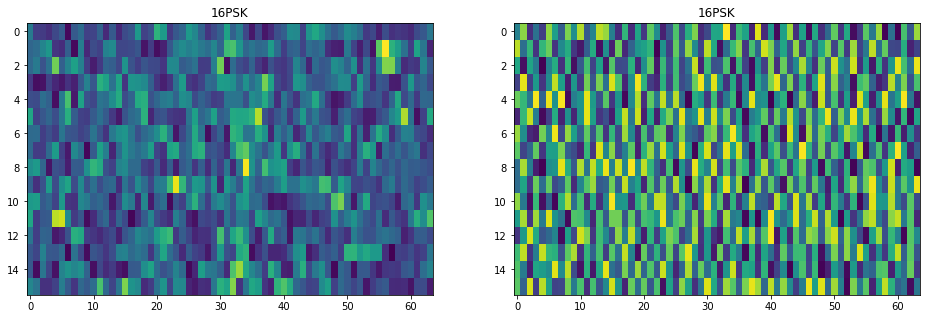

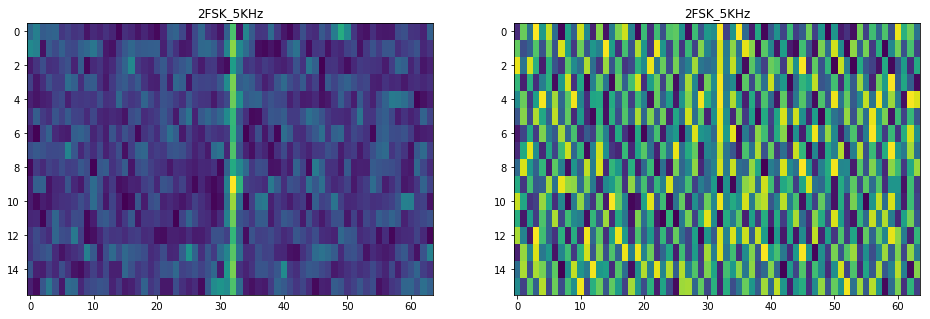

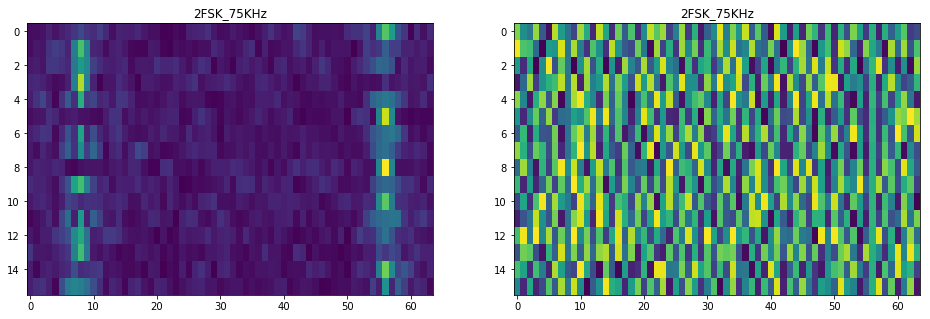

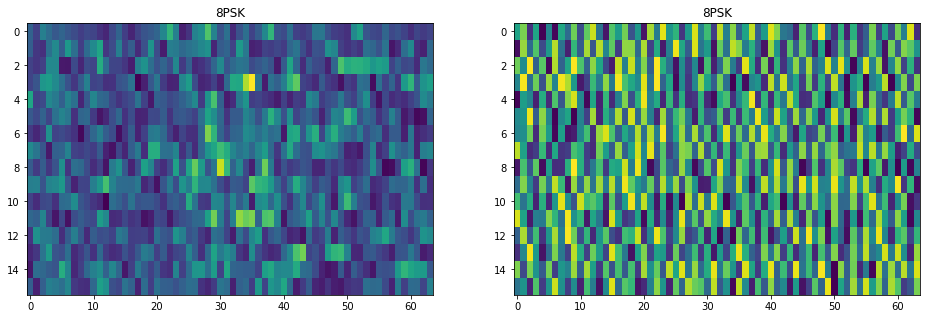

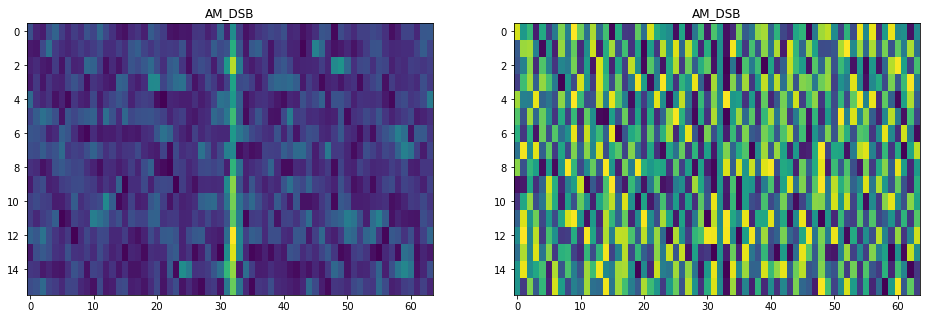

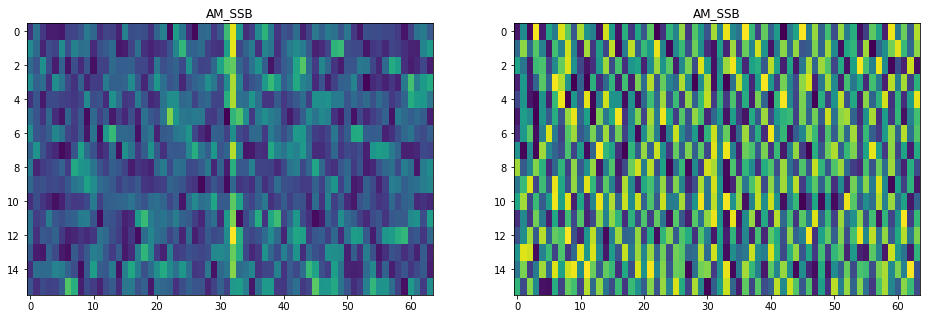

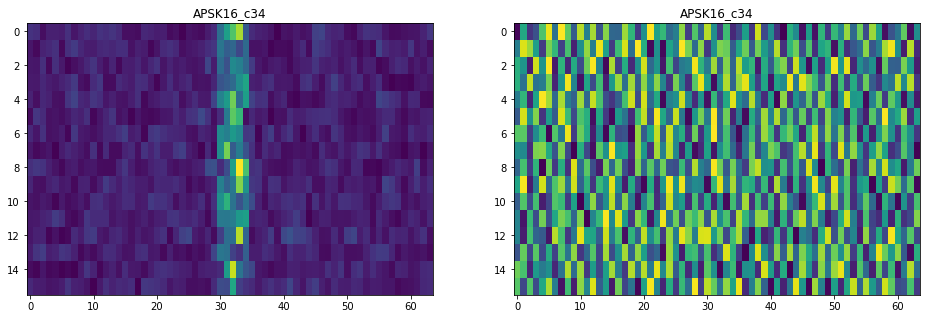

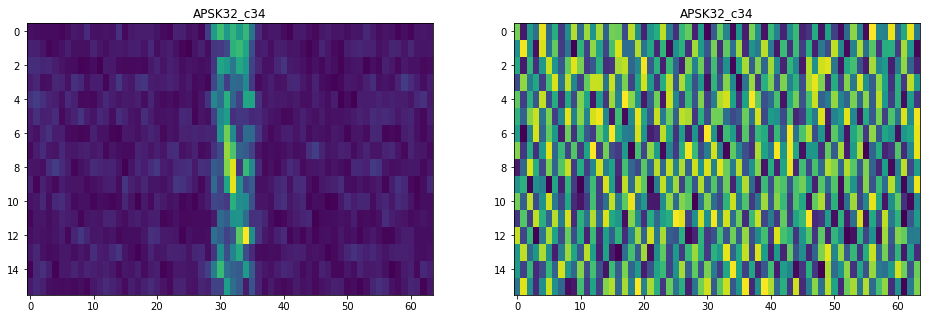

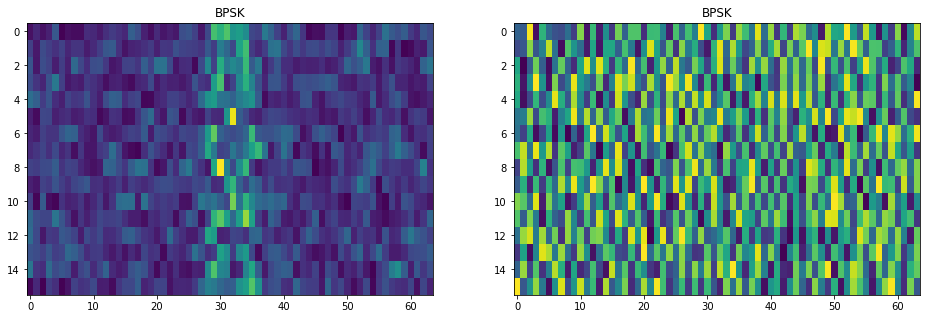

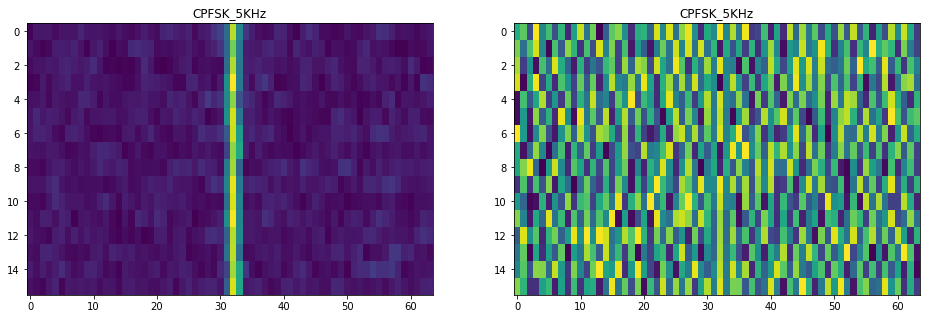

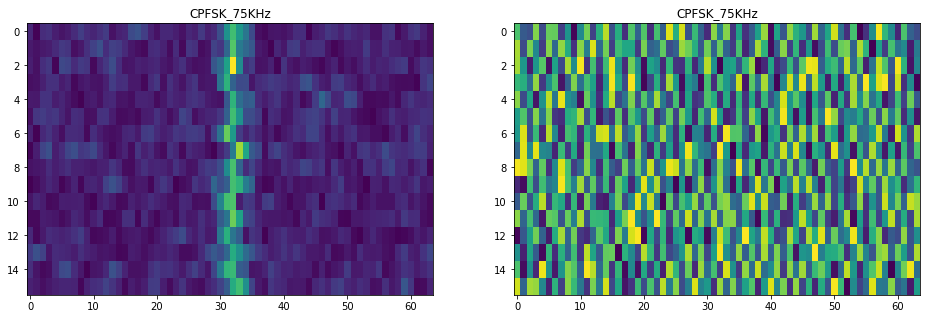

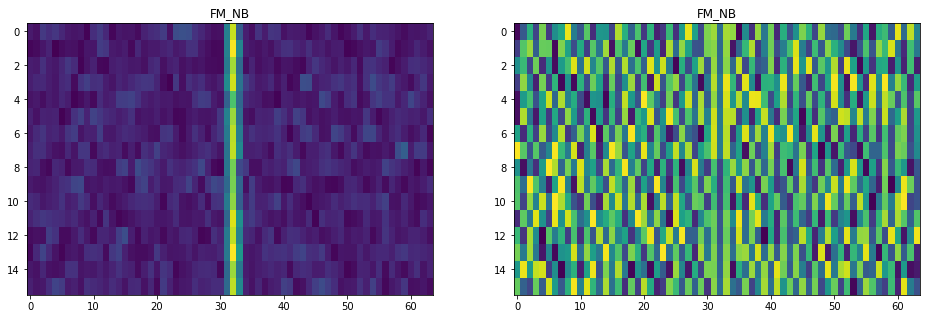

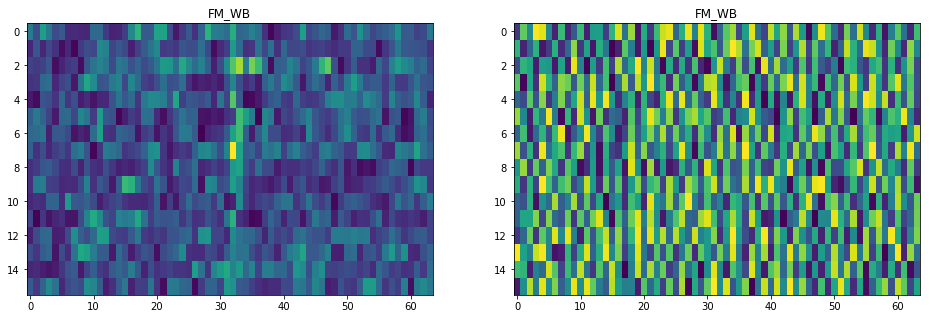

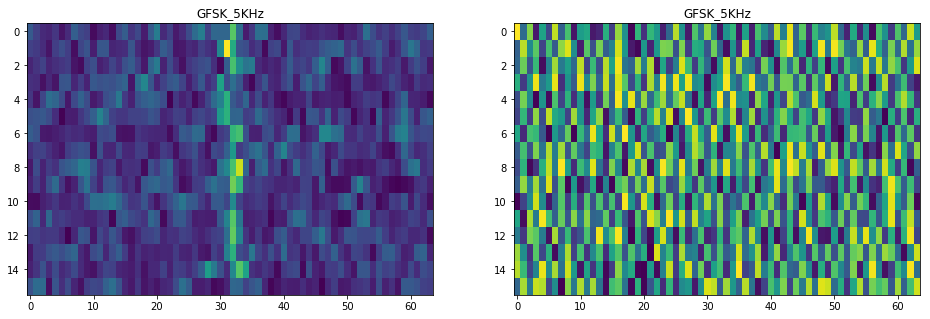

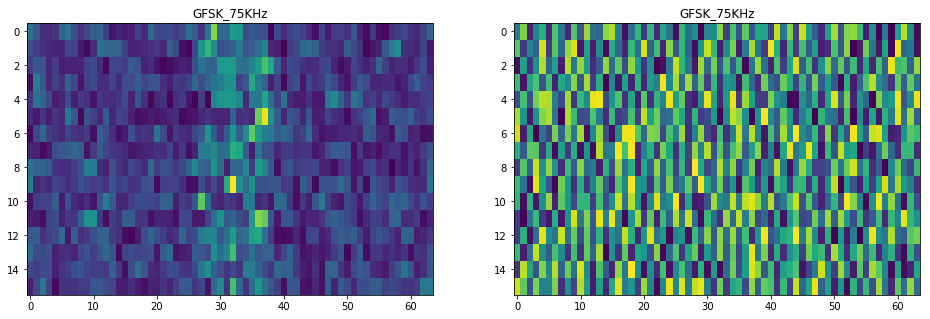

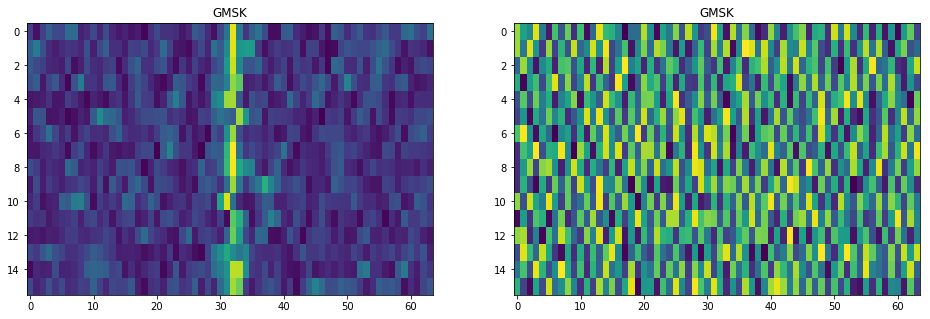

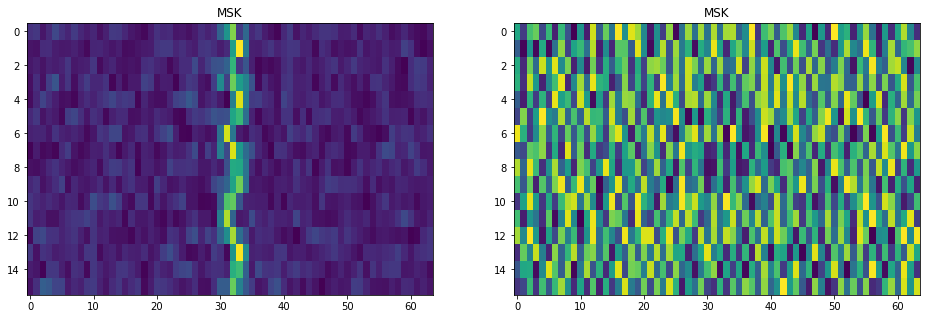

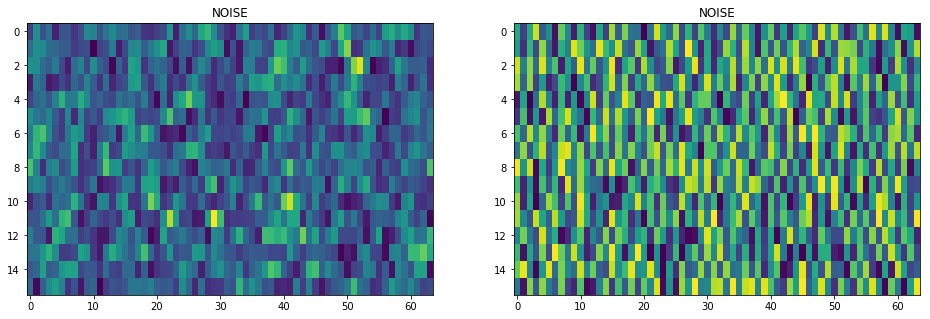

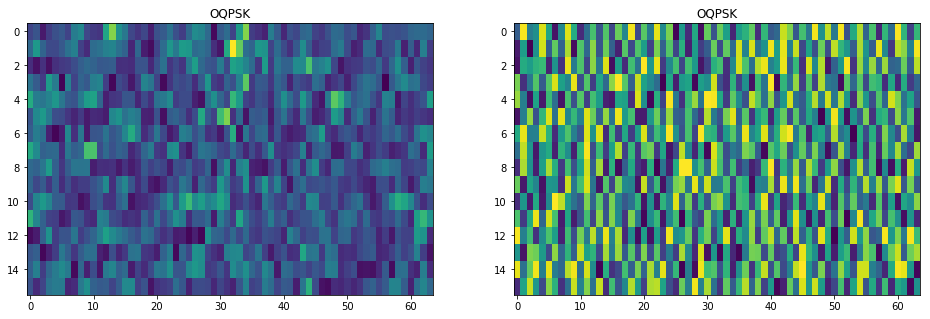

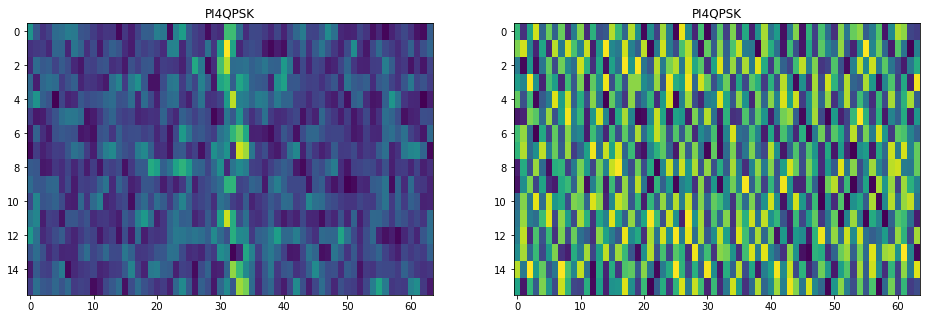

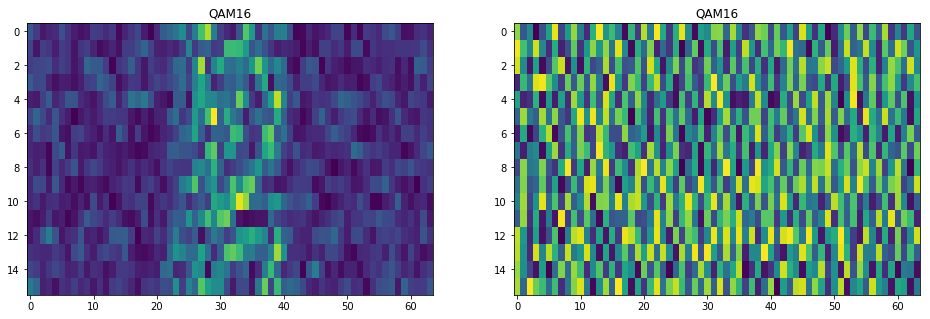

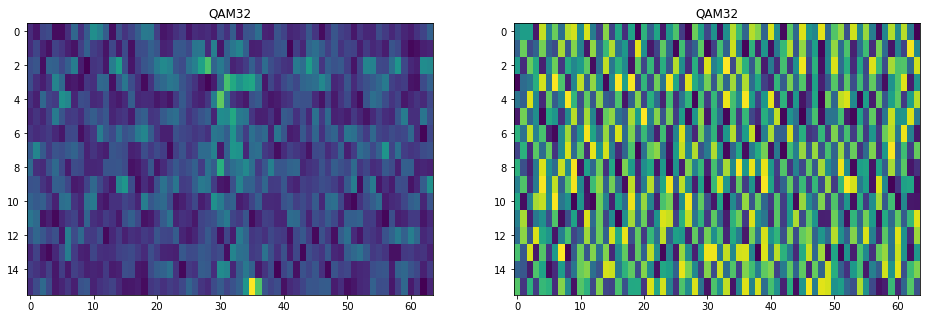

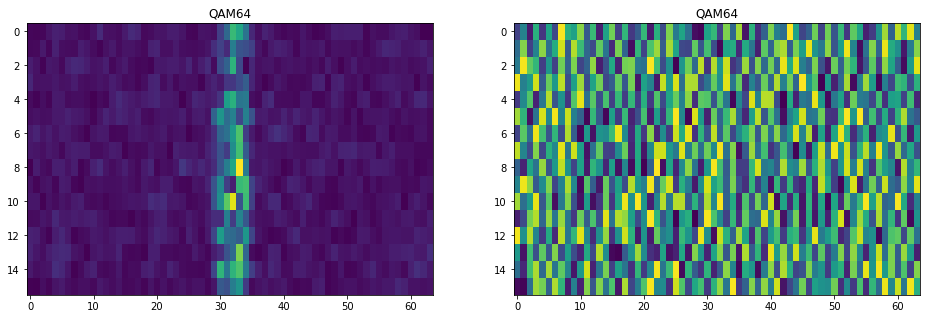

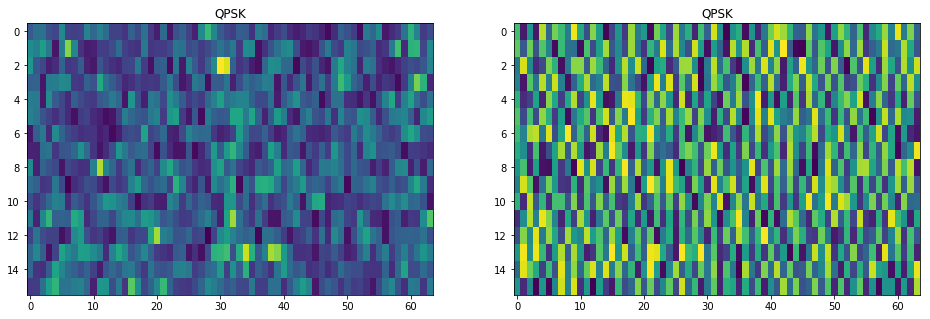

In [28]:
for modType in data.modTypes[:]:
    min_SNR = -10
    max_SNR = 10
    snr_step = 4

    # get random snr within valid range
    snrValue = random.randrange(min_SNR, max_SNR, snr_step)

    # get a collection of signals
    collection_of_instances = data.dataCube[modType, snrValue]

    # get the complex samples for a specific instance within the collection
    cdata, index = get_complex_samples_for_instance(collection_of_instances)
    print(cdata.shape,index)

    # setup inspect
    sample_rate = data.instance_shape[1]
    Ts = 1.0 / sample_rate
    t = np.arange(0, len(cdata[0])) * Ts
    window = 16
    fold = cdata.squeeze().reshape((window,1024//window))
    fold *= np.hamming(1024//window)
    ft = np.fft.fftshift(np.fft.fft(fold, axis=1))
    
    
    plt.figure(figsize=(16, 5))
    plt.subplot(121)
    plt.title(modType)
    plt.imshow(np.abs(ft), aspect='auto')
    plt.subplot(122)
    plt.title(modType)
    plt.imshow(np.angle(ft),aspect='auto')
#     plt.colorbar()
plt.show()

In [7]:
np.arange(9).reshape((3,3))[0]

array([0, 1, 2])

In [19]:
np.hamming?

42.666666666666664